# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Training data shape (X): (50000, 32, 32, 3)
Training labels shape (y): (50000, 1)
Test data shape (X): (10000, 32, 32, 3)
Test labels shape (y): (10000, 1)
First 5 training labels: [[6]
 [9]
 [9]
 [4]
 [1]]


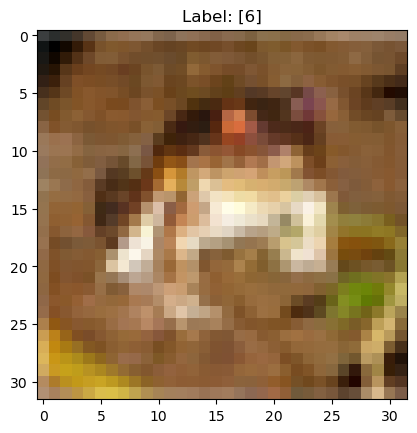

In [3]:
# Inspect the shapes of the data
print("Training data shape (X):", x_train.shape)
print("Training labels shape (y):", y_train.shape)
print("Test data shape (X):", x_test.shape)
print("Test labels shape (y):", y_test.shape)

# Display the first 5 labels
print("First 5 training labels:", y_train[:5])

# Display the first image (optional)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
import numpy as np

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # Layer 1: Convolutional Layer with 32 filters and filter size 3x3
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),

    # Layer 2: Max Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 3: Flatten Layer to convert 2D feature maps to 1D
    Flatten(),

    # Layer 4: Dense Layer with 100 units
    Dense(100, activation="relu"),

    # Layer 5: Output Dense Layer with 10 units for classification
    Dense(10, activation="softmax")
])

# Summarize the model
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

*   Plot the cross entropy loss curve and the accuracy curve

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


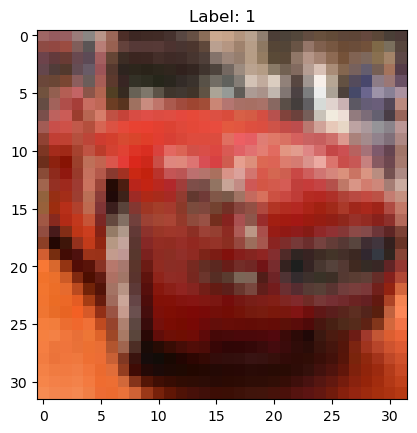

Shape of y_train after one-hot encoding: (50000, 10)
Shape of y_test after one-hot encoding: (10000, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4127 - loss: 1.6345 - val_accuracy: 0.5102 - val_loss: 1.3685
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5818 - loss: 1.1827 - val_accuracy: 0.6060 - val_loss: 1.1247
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6315 - loss: 1.0461 - val_accuracy: 0.6140 - val_loss: 1.1170
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6692 - loss: 0.9429 - val_accuracy: 0.6464 - val_loss: 1.0335
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6990 - loss: 0.8565 - val_accuracy: 0.6426 - val_loss: 1.0385
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7200 - loss: 0.8003 - val_accuracy: 0.6464 - val_loss: 1.0567
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7472 - loss: 0.7220 - val_accuracy: 0.6306 - val_loss: 1.1640
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7749 -

In [16]:
# Importar las librerías necesarias
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Mostrar las formas de los datos cargados
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Visualizar una imagen del dataset
plt.imshow(x_train[5])
plt.title(f"Label: {y_train[5][0]}")
plt.show()

# Normalizar las imágenes (opcional pero recomendado)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verificar las formas de las etiquetas después de la conversión
print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)

# Definir el modelo de red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # Salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

# Entrenar el modelo
batch_size = 32
epochs = 10  # Puedes aumentar este valor para mejorar el rendimiento

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8315 - loss: 0.4862 - val_accuracy: 0.6458 - val_loss: 1.1896
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8512 - loss: 0.4321 - val_accuracy: 0.6476 - val_loss: 1.2272
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8674 - loss: 0.3898 - val_accuracy: 0.6346 - val_loss: 1.3068
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8878 - loss: 0.3366 - val_accuracy: 0.6330 - val_loss: 1.3754
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8950 - loss: 0.3067 - val_accuracy: 0.6362 - val_loss: 1.4866
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9090 - loss: 0.2718 - val_accuracy: 0.6364 - val_loss: 1.5377
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9253 - loss: 0.2289 - val_accuracy: 0.6284 - val_loss: 1.5902
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9298 -

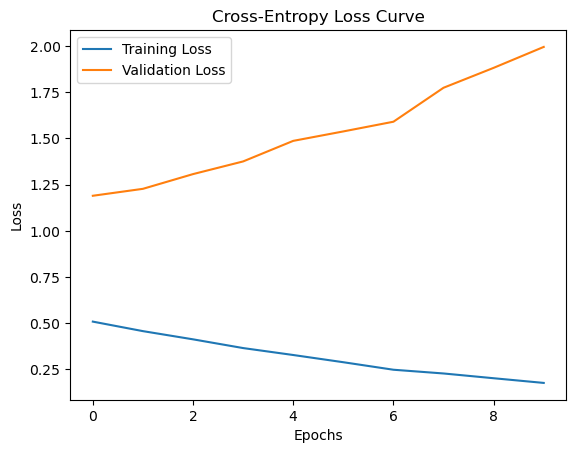

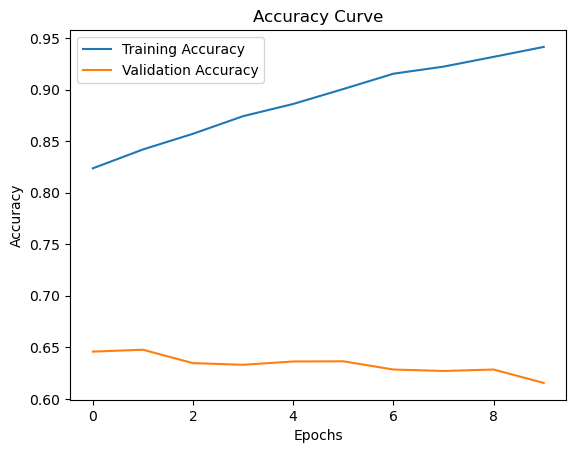

In [17]:
# Your code here :

import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [18]:
from keras.backend import clear_session
clear_session()

In [19]:
# Your code here :

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model2 = Sequential([
    # Layer 1: Convolutional Layer with 32 filters and filter size 3x3
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),

    # Layer 2: Max Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 3: Flatten Layer to convert 2D feature maps to 1D
    Flatten(),

    # Layer 4: Dense Layer with 100 units
    Dense(128, activation="relu"),

    # Layer 5: Output Dense Layer with 10 units for classification
    Dense(10, activation="relu")
])

# Summarize the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [20]:
# Your code here :

# compile model
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 50

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 36s 403ms/step - accuracy: 0.1105 - loss: 4.8173 - val_accuracy: 0.1604 - val_loss: 3.6058
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 0.1695 - loss: 3.5678 - val_accuracy: 0.2064 - val_loss: 3.5751
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 397ms/step - accuracy: 0.2155 - loss: 3.5136 - val_accuracy: 0.2042 - val_loss: 3.4904
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 401ms/step - accuracy: 0.2130 - loss: 3.4768 - val_accuracy: 0.2438 - val_loss: 3.5533
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 39s 441ms/step - accuracy: 0.2454 - loss: 3.3992 - val_accuracy: 0.1122 - val_loss: 3.6784
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.2009 - loss: 2.2480 - val_accuracy: 0.1156 - val_loss: 2.1887
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 39s 447ms/step - accuracy: 0.1516 - loss: 2.1786 - val_accuracy: 0.1088 - val_loss: 2.2041
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 39s 436ms/step - accuracy: 0.1794 - loss: 2.1638 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 417ms/step - accuracy: 0.0990 - loss: 5.0057 - val_accuracy: 0.1038 - val_loss: 4.9067
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 415ms/step - accuracy: 0.1000 - loss: 5.0236 - val_accuracy: 0.1038 - val_loss: 4.9011
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 417ms/step - accuracy: 0.0999 - loss: 4.9973 - val_accuracy: 0.1038 - val_loss: 4.8959
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 427ms/step - accuracy: 0.0972 - loss: 4.9992 - val_accuracy: 0.1038 - val_loss: 4.8910
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 428ms/step - accuracy: 0.0971 - loss: 5.0123 - val_accuracy: 0.1038 - val_loss: 4.8863
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.1009 - loss: 4.9809 - val_accuracy: 0.1038 - val_loss: 4.8819
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 426ms/step - accuracy: 0.0981 - loss: 4.9950 - val_accuracy: 0.1038 - val_loss: 4.8778
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 37s 418ms/step - accuracy: 0.1007 - loss: 5.0098 - val_accu

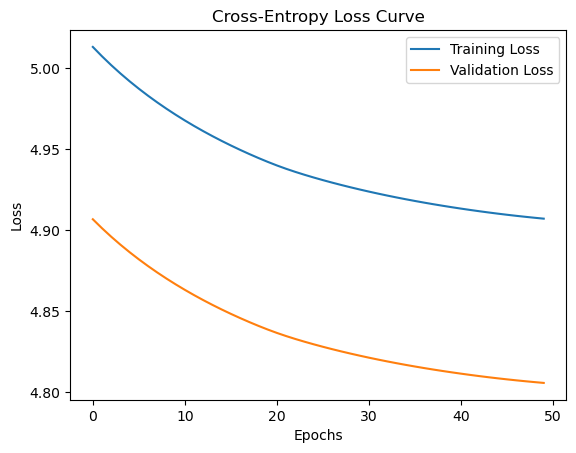

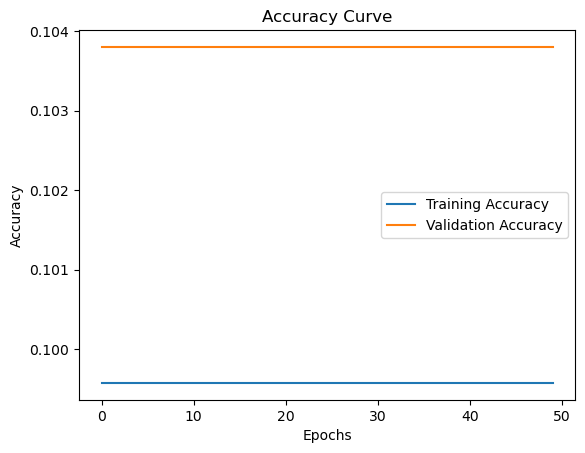

In [21]:
# Your code here :

import matplotlib.pyplot as plt

# Train the model and store the history
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


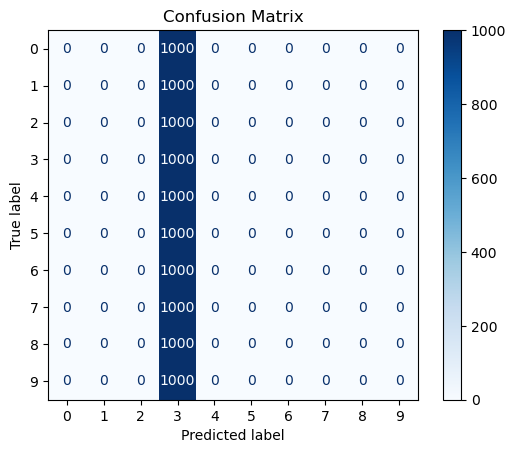

In [22]:
# Your code here :

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict the test set
y_pred_prob = model2.predict(x_test)  # Predict probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in multilabel-indicator format, convert it to multiclass
# Replace this line with the appropriate conversion if y_test has a different format
y_test_multiclass = np.argmax(y_test, axis=1)  # Convert to multiclass if y_test is multilabel-indicator

# Step 2: Compute confusion matrix
# Use the converted y_test_multiclass instead of y_test
cm = confusion_matrix(y_test_multiclass, y_pred)

# Step 3: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
